In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
comcast_tele_consumer=pd.read_csv('C:/Users/User/Desktop/Python Projects/Comcast telecom complaints data/Comcast_telecom_complaints_data.csv')

In [9]:
# check whether date has been imported or not
comcast_tele_consumer.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [10]:
# Step 1: Check the duplicate columns or Variables with duplicate names and delete such columns
comcast_tele_consumer.shape

(2224, 11)

In [11]:
comcast_tele_consumer.columns


Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [15]:
# Hence no duplicate names found we will go to step 2

In [16]:
# Step 2: Check for 0 columns or single value
comcast_tele_consumer.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [18]:
# No Zero Columns or single Value Found, so we proceed to step 3

In [19]:
# Step 3: Missing value Treatment
comcast_tele_consumer.isnull().sum().sort_values(ascending=False)

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [20]:
# No Missing value found so we proceed to step

In [21]:
comcast_tele_consumer.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [23]:
# Add Date Month year with Time and save it into Date_Full
comcast_tele_consumer["Date_Full"] = comcast_tele_consumer["Date_month_year"] + ' ' +  comcast_tele_consumer["Time"]

In [24]:
#Convert Date_Full and Date_month_year to Datetime Format
comcast_tele_consumer["Date_Full"] = pd.to_datetime(comcast_tele_consumer["Date_Full"])
comcast_tele_consumer["Date_month_year"] = pd.to_datetime(comcast_tele_consumer["Date_month_year"])
comcast_tele_consumer_monthly = comcast_tele_consumer.set_index(comcast_tele_consumer["Date_Full"])

<AxesSubplot:xlabel='Date_Full', ylabel='Number of Complaints'>

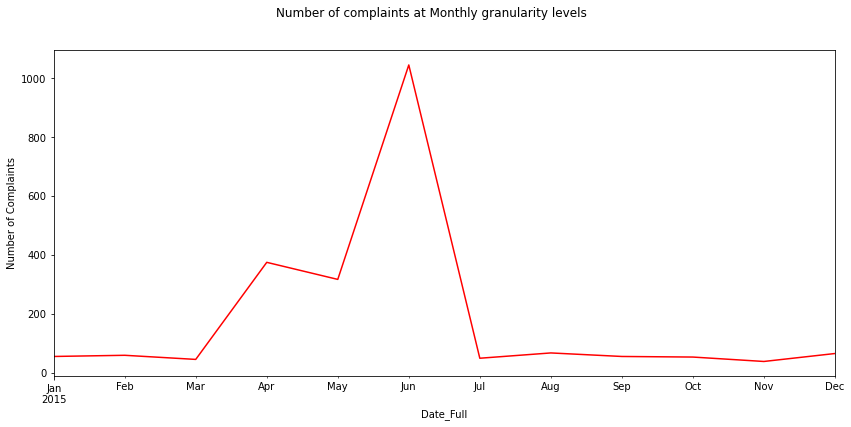

In [25]:
# Provide the trend chart for the number of complaints at monthly granularity levels.
#Increase Graph Size
plt.figure(figsize=(14,6))
plt.suptitle('Number of complaints at Monthly granularity levels')
plt.ylabel('Number of Complaints')
comcast_tele_consumer_monthly.groupby(pd.Grouper(freq="M")).size().plot(color='red')

<AxesSubplot:xlabel='Day of Month', ylabel='Number of Complaints'>

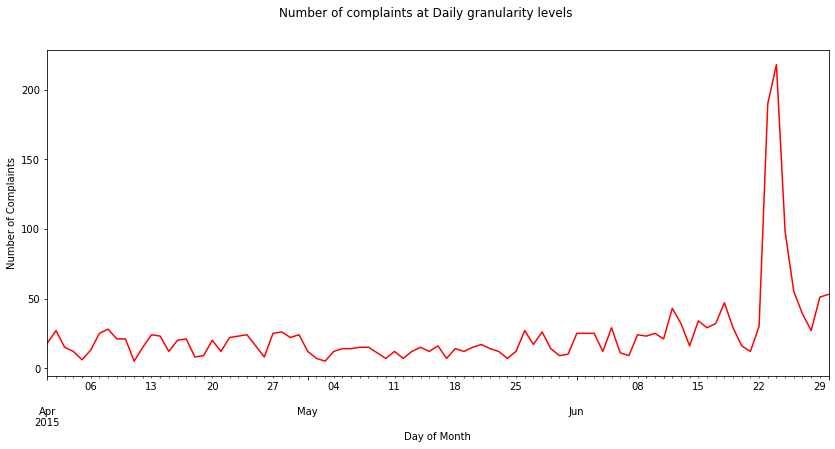

In [26]:
# Provide the trend chart for the number of complaints at daily granularity levels.
comcast_tele_consumer['Day of Month'] = pd.to_datetime(comcast_tele_consumer['Date'])
comcast_tele_consumer_daily = comcast_tele_consumer.set_index(comcast_tele_consumer["Day of Month"])
#Increase Graph Size
plt.figure(figsize=(14,6))
plt.suptitle('Number of complaints at Daily granularity levels')
plt.ylabel('Number of Complaints')
comcast_tele_consumer_daily.groupby(pd.Grouper(freq="D")).size().plot(color='red')

In [27]:
# To get the frequency of complaint types first we have to see all complaint types and check for duplicate, case sensentive
# Incomplete data so that we can make analytics better
comcast_tele_consumer_complaint_type = comcast_tele_consumer["Customer Complaint"].value_counts()

In [28]:
comcast_tele_consumer_complaint_type.head(10)

Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Comcast Billing             11
Data Caps                   11
Comcast Data Caps           11
Unfair Billing Practices     9
Comcast data cap             8
Comcast internet             8
Name: Customer Complaint, dtype: int64

In [30]:
# Better to convert all data into uper case or sentence case so duplicate value will shorted
comcast_tele_consumer_complaint_type=comcast_tele_consumer["Customer Complaint"].str.upper().value_counts()

In [31]:

# Data is huge so we have showed only top 25 Complaint Types. We can show clearly in this table that COMCAST, COMCAST DATA CAP
# COMCAST INTERNET are the Highest top 3 complaint types
comcast_tele_consumer_complaint_type.head(25)

COMCAST                             102
COMCAST DATA CAP                     30
COMCAST INTERNET                     29
COMCAST DATA CAPS                    21
COMCAST BILLING                      18
COMCAST SERVICE                      15
INTERNET SPEED                       15
UNFAIR BILLING PRACTICES             13
DATA CAPS                            13
DATA CAP                             12
COMCAST COMPLAINT                    11
COMCAST/XFINITY                      11
COMCAST INTERNET SERVICE             10
BILLING                               9
BILLING ISSUES                        8
COMCAST CABLE                         5
INTERNET                              5
COMCAST BILLING COMPLAINT             5
COMCAST ISSUES                        5
COMCAST BILLING PRACTICES             5
SERVICE ISSUES                        5
SLOW INTERNET                         5
INTERNET SERVICE                      5
COMPLAINT AGAINST COMCAST             5
COMCAST UNFAIR BILLING PRACTICES      4


In [32]:
# Check how many unique values are under Status Column 
comcast_tele_consumer['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [35]:
# Convert as per Instruction (Task 4) into New Column without changing the main data so that we can use the main data
# in Future
comcast_tele_consumer['New_Status']= ["Open" if Status=="Open" or Status=="Pending" else 
                                      "Closed" for Status in comcast_tele_consumer["Status"]]

In [36]:
# Check whether all status updated or not
comcast_tele_consumer['New_Status'].unique()

array(['Closed', 'Open'], dtype=object)

In [37]:
comcast_tele_consumer_status_by_state = pd.crosstab(comcast_tele_consumer.State,comcast_tele_consumer.New_Status)

In [38]:
comcast_tele_consumer_status_by_state

New_Status,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22
Connecticut,9,3
Delaware,8,4
District Of Columbia,14,2
District of Columbia,1,0


<AxesSubplot:title={'center':'State wise status of complaints'}, xlabel='State'>

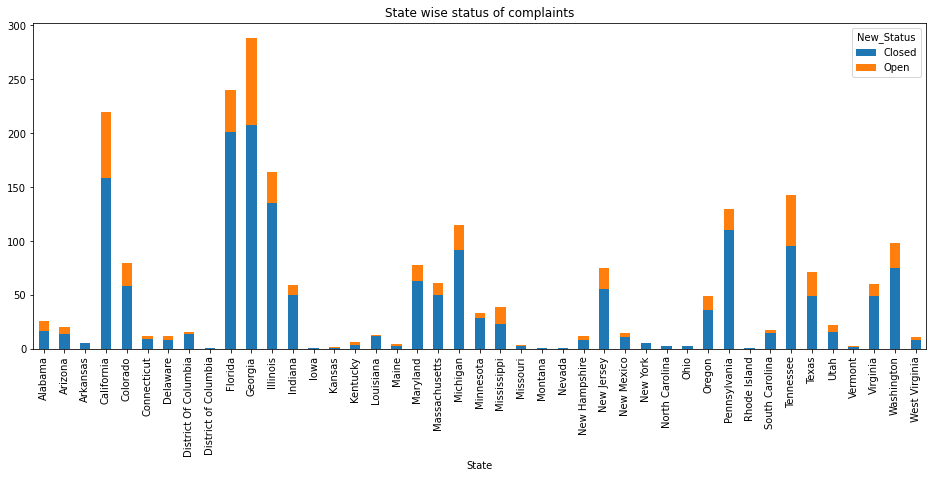

In [39]:
pd.crosstab(comcast_tele_consumer.State,comcast_tele_consumer.New_Status).plot(kind='bar',figsize=(16,6),
                                                      stacked=True,
                                                      title='State wise status of complaints')

In [40]:
# Which state has the maximum complaints - Georgia has maximum number of complaints

In [41]:
comcast_tele_consumer_unresolved_complaints = comcast_tele_consumer[comcast_tele_consumer['New_Status']=='Open']


In [42]:
comcast_tele_consumer_unresolved_complaint_count = comcast_tele_consumer_unresolved_complaints.State.value_counts()
comcast_tele_consumer_unresolved_complaint_count

Georgia                 80
California              61
Tennessee               47
Florida                 39
Illinois                29
Michigan                23
Washington              23
Texas                   22
Colorado                22
Pennsylvania            20
New Jersey              19
Mississippi             16
Maryland                15
Oregon                  13
Massachusetts           11
Virginia                11
Indiana                  9
Alabama                  9
Arizona                  6
Utah                     6
New Hampshire            4
Delaware                 4
Minnesota                4
New Mexico               4
Connecticut              3
West Virginia            3
South Carolina           3
Kentucky                 3
Maine                    2
District Of Columbia     2
Missouri                 1
Vermont                  1
Kansas                   1
Louisiana                1
Name: State, dtype: int64

Text(0.5, 1.0, 'Highest percentage of unresolved complaints\n')

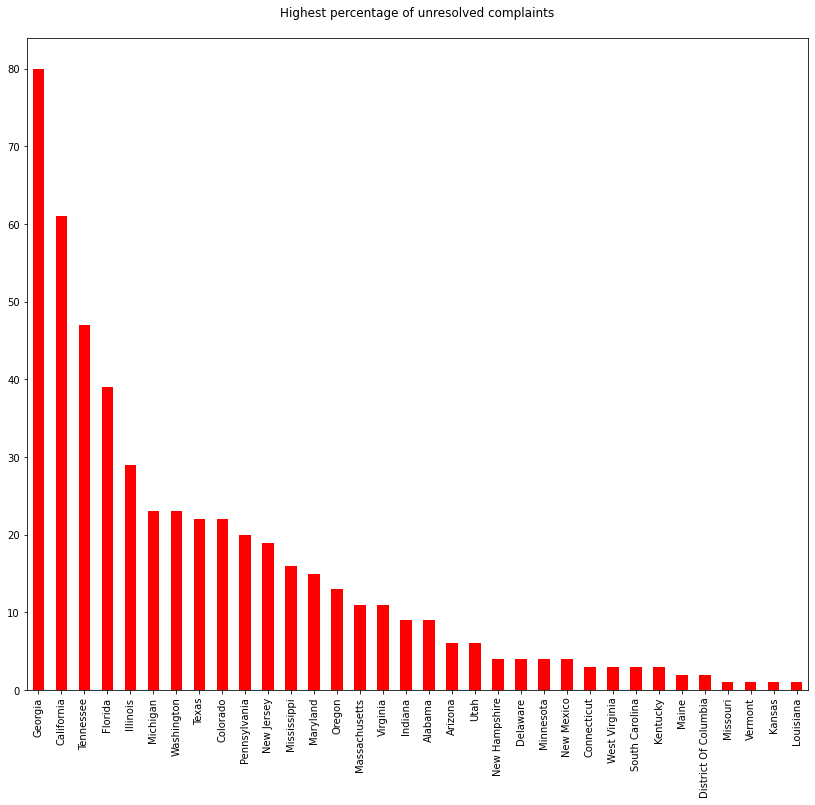

In [43]:
# Georgia has the Highest Number of unresolved complaints
# Show this by Bar Graph
comcast_tele_consumer_unresolved_complaint_count.plot(kind='bar',figsize=(14,12),color="red")
plt.title('Highest percentage of unresolved complaints\n')

In [44]:
# Check unique values in Received Via Column
comcast_tele_consumer['Received Via'].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [46]:
# So there are only two values in that columns so no need to short we can directly proceed to task 6

In [47]:
comcast_tele_consumer.New_Status.value_counts()

Closed    1707
Open       517
Name: New_Status, dtype: int64

<AxesSubplot:title={'center':'Complaints Status through the Internet & Customer Care Calls\n'}, ylabel='New_Status'>

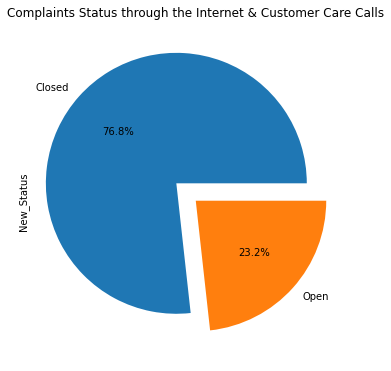

In [48]:
# Used autopct='%1.1f%%'  to show percentage under the pie chart
myexplode = [0.2, 0]
plt.title('Complaints Status through the Internet & Customer Care Calls\n')
comcast_tele_consumer.New_Status.value_counts().plot(kind='pie',explode = myexplode,autopct='%1.1f%%',
                        figsize = (14,6))